# **Experiment Notebook**



---
## 0. Setup Environment

### 0.a Install Mandatory Packages

> Do not modify this code before running it

In [1]:
# Do not modify this code

import os
import sys
from pathlib import Path

COURSE = "36106"
ASSIGNMENT = "AT1"
DATA = "data"

asgmt_path = f"{COURSE}/assignment/{ASSIGNMENT}"
root_path = "./"

print("###### Install required Python packages ######")
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

if os.getenv("COLAB_RELEASE_TAG"):

    from google.colab import drive
    from pathlib import Path

    print("\n###### Connect to personal Google Drive ######")
    gdrive_path = "/content/gdrive"
    drive.mount(gdrive_path)
    root_path = f"{gdrive_path}/MyDrive/"

print("\n###### Setting up folders ######")
folder_path = Path(f"{root_path}/{asgmt_path}/") / DATA
folder_path.mkdir(parents=True, exist_ok=True)
print(f"\nYou can now save your data files in: {folder_path}")

if os.getenv("COLAB_RELEASE_TAG"):
    %cd {folder_path}


###### Install required Python packages ######

###### Setting up folders ######

You can now save your data files in: 36106/assignment/AT1/data


### 0.b Disable Warnings Messages

> Do not modify this code before running it

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [3]:
# <Student to fill this section>

### 0.d Import Packages

In [56]:
import ipywidgets as widgets
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

---
## A. Project Description


In [5]:
# @title Student Information
wgt_student_name = widgets.Text(
    value=None,
    placeholder='<student to fill this section>',
    description='Student Name:',
    style={'description_width': 'initial'},
    disabled=False
)

wgt_student_id = widgets.Text(
    value=None,
    placeholder='<student to fill this section>',
    description='Student Id:',
    style={'description_width': 'initial'},
    disabled=False
)

widgets.HBox([wgt_student_name, wgt_student_id])

In [6]:
# @title Experiment ID

wgt_experiment_id = widgets.BoundedIntText(
    value=1,
    min=0,
    max=3,
    step=1,
    description='Experiment ID:',
    style={'description_width': 'initial'},
    disabled=False
)
wgt_experiment_id

BoundedIntText(value=1, description='Experiment ID:', max=3, style=DescriptionStyle(description_width='initial…

In [7]:
# @title Business Objective

wgt_business_objective = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Business Objective:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_business_objective

Textarea(value='', description='Business Objective:', layout=Layout(height='100%', width='auto'), placeholder=…

---
## B. Experiment Description

In [8]:
# @title Experiment Hypothesis

wgt_experiment_hypothesis = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiment Hypothesis:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_hypothesis

Textarea(value='', description='Experiment Hypothesis:', layout=Layout(height='100%', width='auto'), placehold…

In [9]:

# @title Experiment Expectations

wgt_experiment_expectations = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiment Expectations:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_expectations

Textarea(value='', description='Experiment Expectations:', layout=Layout(height='100%', width='auto'), placeho…

---
## C. Data Understanding

### C.1   Load Datasets

> Do not change this code

In [22]:
# Load training data
X_train = pd.read_csv('/Users/ratikpant/Desktop/machine learning/ X_train.csv')
y_train = pd.read_csv('/Users/ratikpant/Desktop/machine learning/ y_train.csv')


In [11]:
pwd

'/Users/ratikpant/Desktop/machine learning'

In [23]:
# Load validation data
X_val = pd.read_csv('/Users/ratikpant/Desktop/machine learning/ X_val.csv')
y_val = pd.read_csv('/Users/ratikpant/Desktop/machine learning/ y_val.csv')

In [24]:
# Load testing data
X_test = pd.read_csv('/Users/ratikpant/Desktop/machine learning/X_test.csv')
y_test = pd.read_csv('/Users/ratikpant/Desktop/machine learning/y_test.csv')


In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3316 entries, 0 to 3315
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number_of_bedrooms                   3316 non-null   int64  
 1   floor_area                           3316 non-null   int64  
 2   current_level                        3316 non-null   float64
 3   total_level                          3316 non-null   float64
 4   number_of_bathrooms                  3316 non-null   int64  
 5   advertised_month                     3316 non-null   int64  
 6   suburb_Adelaide                      3316 non-null   int64  
 7   suburb_Brisbane                      3316 non-null   int64  
 8   suburb_Canberra                      3316 non-null   int64  
 9   suburb_Melbourne                     3316 non-null   int64  
 10  suburb_Perth                         3316 non-null   int64  
 11  suburb_Sydney                 

In [ ]:
#advertised_month 

In [26]:
X_train['advertised_month'].value_counts()

advertised_month
5    1629
6    1461
4     226
Name: count, dtype: int64

In [27]:
X_val['advertised_month'].value_counts()

advertised_month
6    601
5    343
4     39
Name: count, dtype: int64

In [28]:
X_test['advertised_month'].value_counts()

advertised_month
5    352
6    294
4     40
Name: count, dtype: int64

# Now converting the column 'advertised_month' into one_hot_encoding for the model to learn better patterns from the months 04,05,06. Converting for train, val and test for 0 disparity



In [29]:
X_train = pd.get_dummies(X_train, columns = ['advertised_month'], dtype =int)

In [30]:
X_val = pd.get_dummies(X_val, columns = ['advertised_month'], dtype =int)

In [31]:
X_test = pd.get_dummies(X_test, columns = ['advertised_month'], dtype =int)

---
## D. Feature Selection


In [32]:
# <Student to fill this section>

features_list = ['number_of_bedrooms', 'floor_area', 'current_level', 'total_level', 'number_of_bathrooms', 
                'suburb_Brisbane', 'suburb_Adelaide', 'suburb_Canberra', 'suburb_Melbourne', 'suburb_Perth', 
                'suburb_Sydney', 'furnished_Furnished','furnished_Semi-Furnished', 'furnished_Unfurnished', 
                'tenancy_preference_Bachelors', 'tenancy_preference_Bachelors/Family', 'tenancy_preference_Family',
                'advertised_month_4', 'advertised_month_5','advertised_month_6' ]

In [19]:
# @title Feature Selection Explanation

wgt_feat_selection_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_explanation

Textarea(value='', description='Feature Selection Explanation:', layout=Layout(height='100%', width='auto'), p…

---
## E. Train Machine Learning Model

### E.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [20]:
# <Student to fill this section>

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

# modelling validation and testing after fitting on the training set , keeping fit_intercpt True

In [34]:
model1 = LinearRegression(fit_intercept = True)
model1.fit(X_train, y_train)

LinearRegression()

# validation set

In [35]:
y_val_pred = model1.predict(X_val)

In [36]:
mse_val = mse(y_val_pred, y_val)
rmse = np.sqrt(mse_val)
print("the rmse score is :", rmse)

the rmse score is : 29.587512894139856


# Test set

In [42]:
y_test_pred = model1.predict(X_test)

In [43]:
mse_test = mse(y_test_pred, y_test)
rmse_test = np.sqrt(mse_test)
print("the rmse score is :", rmse_test)

the rmse score is : 42.23105665489805


# FIT INTERCEPT FALSE

In [44]:
model2 = LinearRegression(fit_intercept = False)

In [67]:
model2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

# validation set

In [68]:
y_pred_val1 = model2.predict(X_val)

In [69]:
mse_val1 = mse(y_pred_val1, y_val)
rmse1 = np.sqrt(mse_val1)
print("the rmse score is: ", rmse1)

the rmse score is:  29.587512894140335


In [70]:
y_pred_test1 = model2.predict(X_test)

In [71]:
mse_test1 = mse(y_pred_test1,y_test)
rmsee1 = np.sqrt(mse_test1)
print("the rmse score is:", rmsee1)

the rmse score is: 42.23105665489979


In [61]:
import seaborn as sns

# validation set when fit_intercept -> true

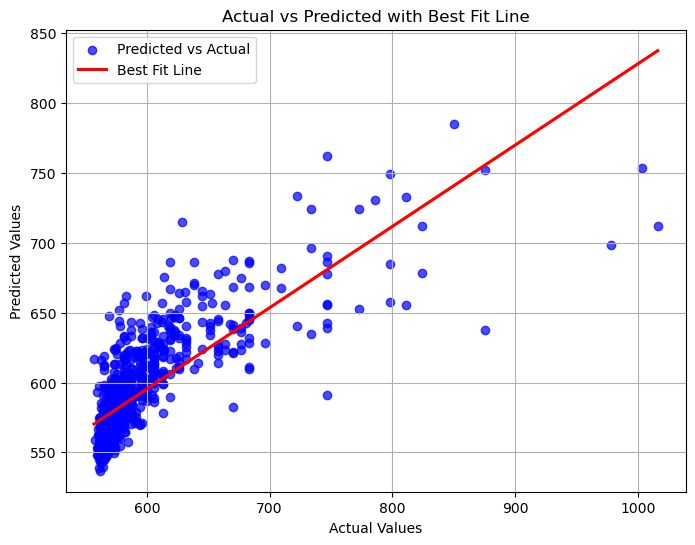

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, color='blue', alpha=0.7, label='Predicted vs Actual')

# Best-fit line (using Seaborn's regression plot)
sns.regplot(x=y_val, y=y_val_pred, scatter=False, color='red', label='Best Fit Line', ci=None)

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with Best Fit Line')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
#test set when intercept -> true

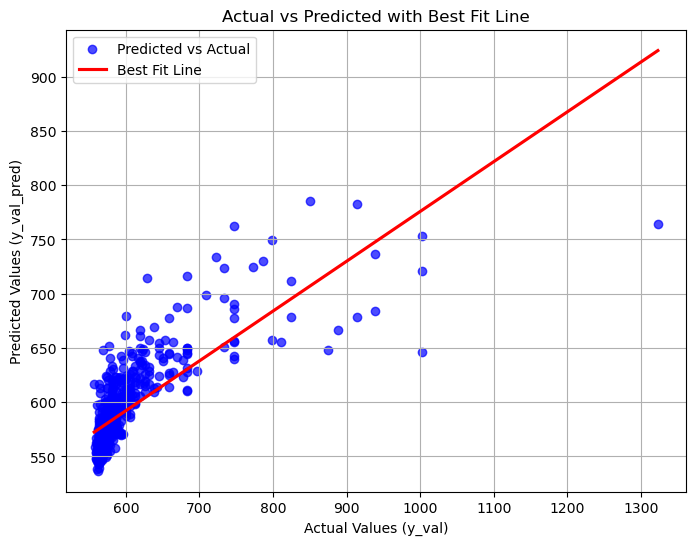

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, label='Predicted vs Actual')

# Best-fit line (using Seaborn's regression plot)
sns.regplot(x=y_test, y=y_test_pred, scatter=False, color='red', label='Best Fit Line', ci=None)

# Labels and title
plt.xlabel('Actual Values (y_val)')
plt.ylabel('Predicted Values (y_val_pred)')
plt.title('Actual vs Predicted with Best Fit Line')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
\

In [21]:
# @title Algorithm Selection Explanation

wgt_algo_selection_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Algorithm Selection Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_algo_selection_explanation

Textarea(value='', description='Algorithm Selection Explanation:', layout=Layout(height='100%', width='auto'),…

### E.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [22]:
# <Student to fill this section>

In [23]:
# @title Hyperparameters Selection Explanation

wgt_hyperparams_selection_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Hyperparameters Selection Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_hyperparams_selection_explanation

Textarea(value='', description='Hyperparameters Selection Explanation:', layout=Layout(height='100%', width='a…

### E.3 Fit Model

In [24]:
# <Student to fill this section>

### E.4 Model Technical Performance

> Provide some explanations on model performance


In [25]:
# <Student to fill this section>

In [26]:
# @title Model Performance Explanation

wgt_model_performance_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Model Performance Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_model_performance_explanation

Textarea(value='', description='Model Performance Explanation:', layout=Layout(height='100%', width='auto'), p…

### E.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [27]:
# <Student to fill this section>

In [28]:
# @title Model Business Impacts Explanation

wgt_model_business_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Model Business Impacts Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_model_business_explanation

Textarea(value='', description='Model Business Impacts Explanation:', layout=Layout(height='100%', width='auto…

## F. Experiment Outcomes

In [29]:
# @title Experiment Outcomes Explanation

wgt_experiment_outcomes_explanation = widgets.Select(
    options=['Hypothesis Confirmed', 'Hypothesis Partially Confirmed', 'Hypothesis Rejected'],
    value='Hypothesis Rejected',
    description='Experiment Outcomes:',
    disabled=False,
)

wgt_experiment_outcomes_explanation

Select(description='Experiment Outcomes:', index=2, options=('Hypothesis Confirmed', 'Hypothesis Partially Con…

In [30]:
# @title Experiments Results Explanation

wgt_experiment_results_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiments Results Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_results_explanation

Textarea(value='', description='Experiments Results Explanation:', layout=Layout(height='100%', width='auto'),…